# Chapitre 2 : Application des théorèmes limites

## Convergence p.s. et en loi
On considère une suite de variable aléatoire $(X_n)$ i.i.d. de loi sur l'ensemble $\{-3.2,1.6,2.7\}$ telle que 

$$\mathbb{P}(X_n=-3.2)=1/3,\quad \mathbb{P}(X_n=1.6)=1/4,\quad \mathbb{P}(X_n=2.7)=5/12.$$

On commence par simuler ces variables aléatoires.

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *

In [2]:
n=10000;
U=rand(1,n);
X=-3.2*(U<1./3)+ 1.6*(U>1./3)*(U<7./12)+2.7*(U>7./12);

#Vérifications :
print(float(sum(X==2.7))/10000,5./12)

(0.4238, 0.4166666666666667)


### Loi des grands nombres :

Comme les variables aléatoires $(X_n)_{n\ge1}$ sont intégrables (i.e. $\mathbb{E}(\lvert X_n\lvert)<\infty$), la loi forte des grands nombres nous assure que 

$$\lim_{n\to\infty} \frac{X_1+\dots X_n}{n} \longrightarrow \mathbb{E}(X_1),\quad a.s.$$

0.458333333333


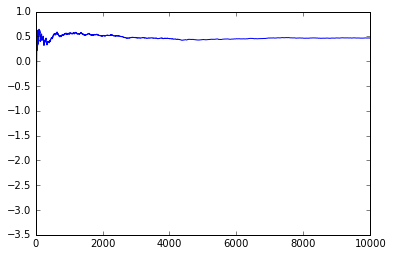

In [3]:
m=-3.2*1./3 + 1.6*1./4 + 2.7*5./12;
print(m)

S=cumsum(X);
plot(S/range(1,n+1))

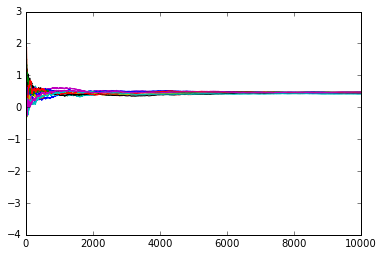

In [4]:
p=12; #nombre de trajectoires
U=rand(p,n);
X=-3.2*(U<1./3)+ 1.6*(U>1./3)*(U<7./12)+2.7*(U>7./12);
S=cumsum(X,axis=1); #on somme selon les colonnes
for i in range(1,p+1):
    plot(S[i-1,]/range(1,n+1))

### Théorème central limite
Comme $X\in L^2$, le théorème central limite nous assure que 

$$\sqrt{\frac{n}{Var(X_1)} }\left(\frac{X_1+\dots X_n}{n} -\mathbb{E}(X_1) \right) \overset{(loi)}{\longrightarrow} \mathcal{N}(0,1). $$

In [5]:
v= 1./3*(-3.2)**2 +1./4*(1.6)**2+ 5./12*(2.7)**2-m**2; #variance


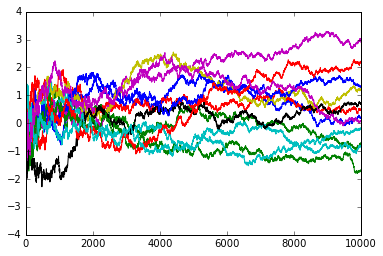

In [6]:
p=12; #nombre de trajectoires
U=rand(p,n);
X=-3.2*(U<1./3)+ 1.6*(U>1./3)*(U<7./12)+2.7*(U>7./12);
S=cumsum(X,axis=1); #on somme selon les colonnes
for i in range(1,p+1):
    plot((S[i-1,]/range(1,n+1)-m) * (sqrt(range(1,n+1))/sqrt(v)))

In [ ]:
p=1000; #nombre de trajectoires
n=10000; #nombre de répétitions
U=rand(p,n);
X=-3.2*(U<1./3)+ 1.6*(U>1./3)*(U<7./12)+2.7*(U>7./12);
S=sum(X,axis=1); #on somme selon les colonnes
hist((S/n-m) * (sqrt(n)/sqrt(v)))


Pour comparaison, si on tire un $n$ échantillon suivant une loi $\mathcal{N}(0,1)$. POur cela, on utilise la méthode de Box-Muller, 

$$X_n=\sqrt{-2\log(U_n)}cos(2\pi V_n).$$

In [ ]:

X=sqrt(-2*log(rand(p,1)))*cos(2*pi*rand(p,1));
hist(X)